
## Connection to Overfitting in Machine Learning

The way a Taylor series uses an increasing number of terms to perfectly fit a function provides an excellent analogy for the concept of **overfitting** in machine learning.

### The Parallel

* **Taylor Series:** To better approximate a function around a point, we add more terms ($x^2, x^3, x^4, \dots$). Each term increases the polynomial's flexibility, allowing it to match the function's curve more precisely.
* **Machine Learning Model:** To fit a set of data points, a model (like polynomial regression) can use more parameters. More parameters give the model more flexibility to bend and twist its curve to pass as close to each data point as possible.

### What is Overfitting?

In machine learning, our data usually contains both a real underlying pattern and random **noise**. Overfitting occurs when a model is so flexible (has too many parameters) that it starts fitting the noise in the training data, not just the pattern.

This means the model performs exceptionally well on the data it was trained on, but it fails to **generalize** to new, unseen data because it learned the random quirks of the training set.



The wiggly line in the image is a classic example of overfitting. It hits every data point but is a poor representation of the general trend.

### Comparison Table

While the analogy is powerful, their goals are different.

| Aspect | Taylor Series | Machine Learning (Overfitting) |
| :--- | :--- | :--- |
| **Input** | A known, perfectly defined function (e.g., $\sin(x)$). | A finite set of noisy data points. |
| **Process** | Coefficients are **analytically derived** from the function's derivatives. | Parameters are **numerically optimized** to minimize error across data points. |
| **Goal** | To create a perfect *local approximation* of a known function. | To find a *general trend* in data that applies to new, unseen examples. |
| **"The Danger"** | A finite number of terms gives an approximation, not a perfect representation. | Too much flexibility causes the model to learn noise, leading to poor performance on new data. |

In short, the immense flexibility of a Taylor series is a feature for approximating a pure mathematical function. However, that same level of flexibility becomes a bug—overfitting—when applied to real-world, noisy data.

---

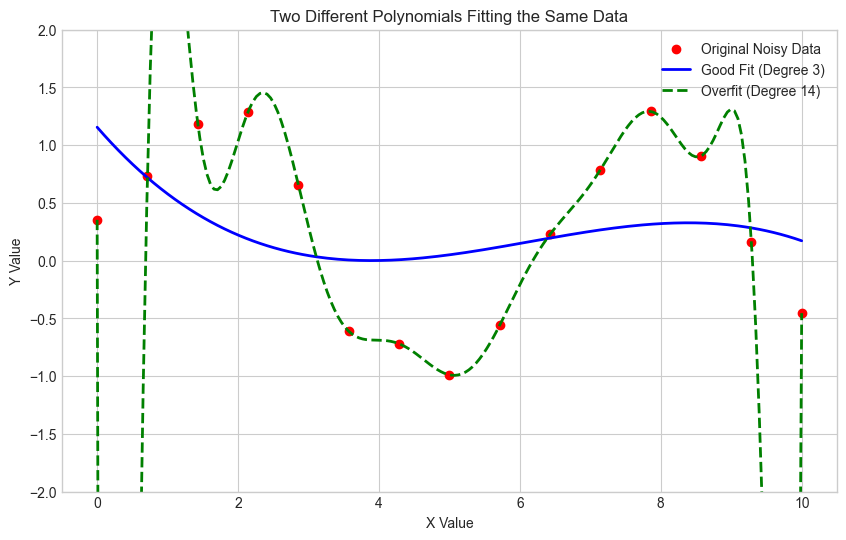

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate a sample dataset with some noise
np.random.seed(0)  # for reproducibility
x = np.linspace(0, 10, 15)
y_true = np.sin(x)
y_noisy = y_true + np.random.normal(0, 0.2, len(x))

# 2. Fit the first polynomial function (a "good" fit)
degree_good = 3
coeffs_good = np.polyfit(x, y_noisy, degree_good)
poly_good = np.poly1d(coeffs_good)

# 3. Fit the second polynomial function (an "overfit" model)
degree_overfit = 14
coeffs_overfit = np.polyfit(x, y_noisy, degree_overfit)
poly_overfit = np.poly1d(coeffs_overfit)

# 4. Generate points for plotting the smooth curves
x_plot = np.linspace(0, 10, 200)
y_plot_good = poly_good(x_plot)
y_plot_overfit = poly_overfit(x_plot)

# 5. Plot everything for comparison
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))

# Plot the original data
plt.scatter(x, y_noisy, color='red', label='Original Noisy Data')

# Plot the two different polynomial fits
plt.plot(x_plot, y_plot_good, color='blue', linewidth=2, label=f'Good Fit (Degree {degree_good})')
plt.plot(x_plot, y_plot_overfit, color='green', linestyle='--', linewidth=2, label=f'Overfit (Degree {degree_overfit})')

# Add labels and title
plt.title('Two Different Polynomials Fitting the Same Data')
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.legend()
plt.ylim(-2, 2) # Set y-axis limits for better visualization
plt.show()